Layer sensitivity analysis


In [1]:
"""Layer sensitivity analysis."""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the path to your CSV file
file_path = (  # Update with your actual file path
    "wandb_export_2024-05-20T18_40_53.429+02_00.csv"
)

# Read the first row to get the labels
with open(file_path, encoding="utf-8") as f:
    labels = f.readline().strip().split(",")

# Read the CSV file starting from the second row
data = pd.read_csv(file_path, header=None, skiprows=1, names=labels)

# Display the first few rows of the data to understand its structure
# print(data.head())
# print(data.head(1))

In [3]:
# Convert all columns to numeric, forcing errors to NaN
data = data.apply(pd.to_numeric, errors="coerce")

# Extract the data columns (excluding the first index column)
data_columns = data.iloc[:, 1:]

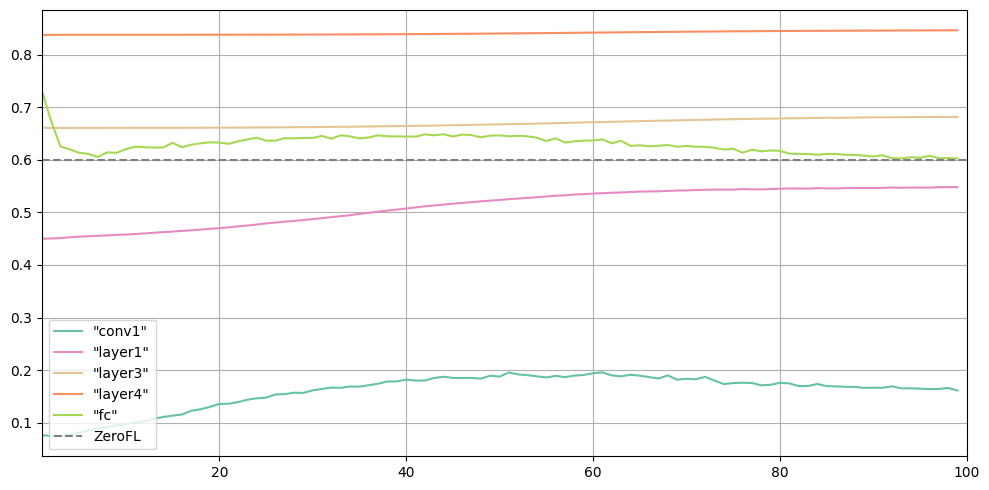

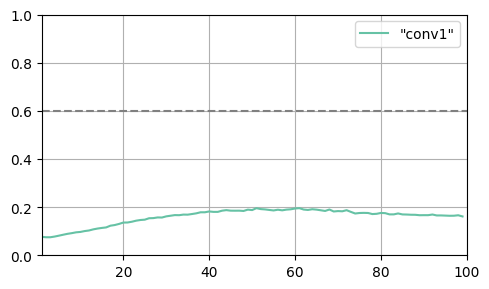

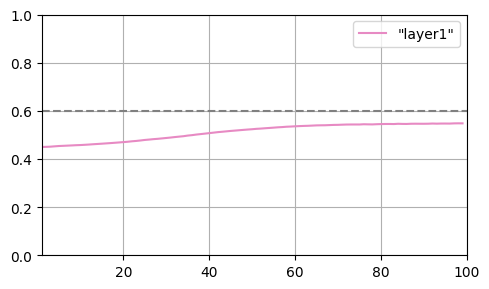

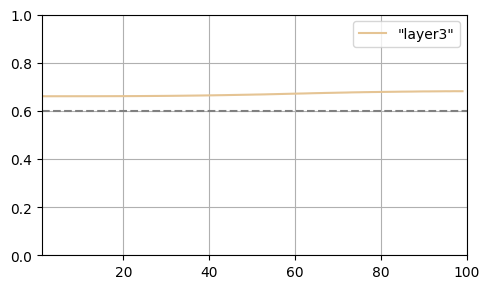

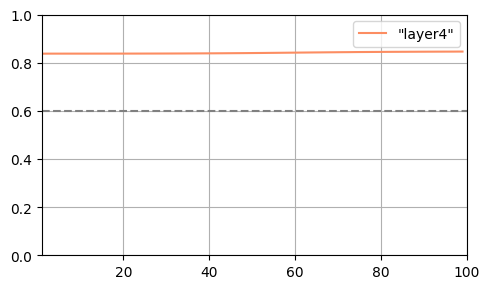

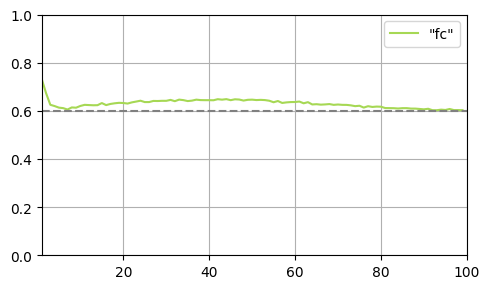

In [4]:
ZeroFL = 0.6
# Plot Resnet18 threshold line


# Define a color palette
palette = sns.color_palette("Set2", len(data_columns.columns))

# Create a dictionary to map each column name to a color
column_colors = dict(zip(data_columns.columns, palette, strict=True))

# Create a line plot for each column using the assigned color
plt.figure(figsize=(10, 5))
for column in data_columns.columns:
    if "power" not in column:
        plt.plot(data[column], label=column, color=column_colors[column])

plt.axhline(y=ZeroFL, color="grey", linestyle="--", label="ZeroFL")
plt.xlim(1, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create additional plots using the assigned colors
for column in data_columns.columns:
    if "power" not in column:
        plt.figure(figsize=(5, 3))
        plt.plot(data[column], label=column, color=column_colors[column])
        plt.ylim(0, 1)  # Set y-axis limits from 0 to 100
        plt.xlim(1, 100)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.axhline(y=ZeroFL, color="grey", linestyle="--", label="ZeroFL")
        plt.show()